# EX 5

Develop a linear regression model for forecasting time series data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Load dataset
df = pd.read_csv("/content/airline-passengers.csv", parse_dates=['Month'], index_col='Month')


In [4]:
print(df.head())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


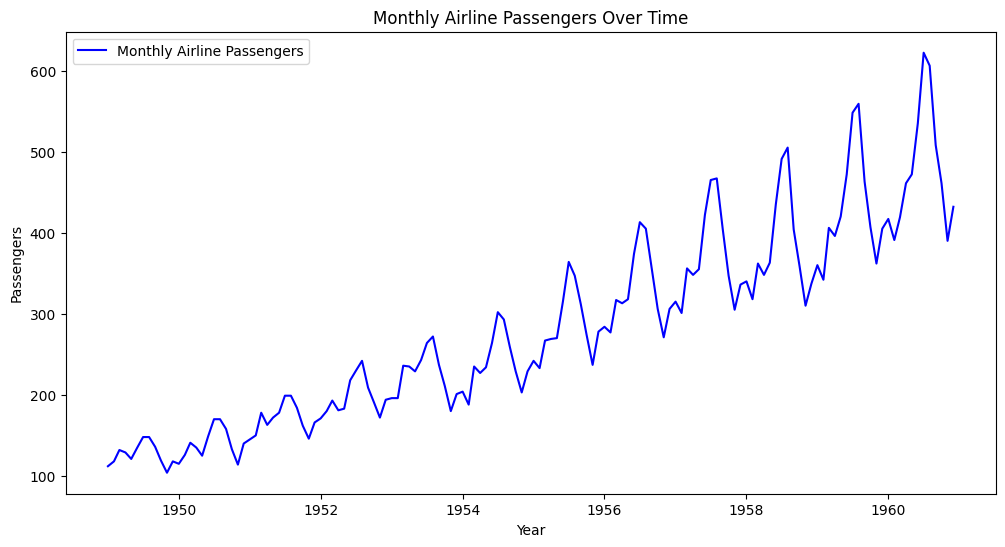

In [5]:
# Plot the time series
plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label="Monthly Airline Passengers", color='blue')
plt.title("Monthly Airline Passengers Over Time")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()

In [6]:
# Create lagged features (previous month's passenger count as feature)
df['Previous_Month'] = df['Passengers'].shift(1)

# Drop missing values from first row
df.dropna(inplace=True)

# Define features (X) and target variable (Y)
X = df[['Previous_Month']]
y = df['Passengers']

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Display train and test sizes
print(f"Training Data: {X_train.shape[0]} samples, Testing Data: {X_test.shape[0]} samples")


Training Data: 114 samples, Testing Data: 29 samples


In [7]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [8]:
# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred) * 100  # Convert to percentage
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"Model Evaluation Results:")
print(f"R² Score (Accuracy): {r2:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Evaluation Results:
R² Score (Accuracy): 55.76%
Mean Absolute Error (MAE): 44.35
Root Mean Squared Error (RMSE): 51.97


In [28]:
df['Previous_2_Months'] = df['Passengers'].shift(2)
df['Previous_3_Months'] = df['Passengers'].shift(3)
df.dropna(inplace=True)

X = df[['Previous_Month', 'Previous_2_Months', 'Previous_3_Months']]
y = df['Passengers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred) * 100
print(f"Improved Accuracy: {r2:.2f}%")


Improved Accuracy: 62.38%


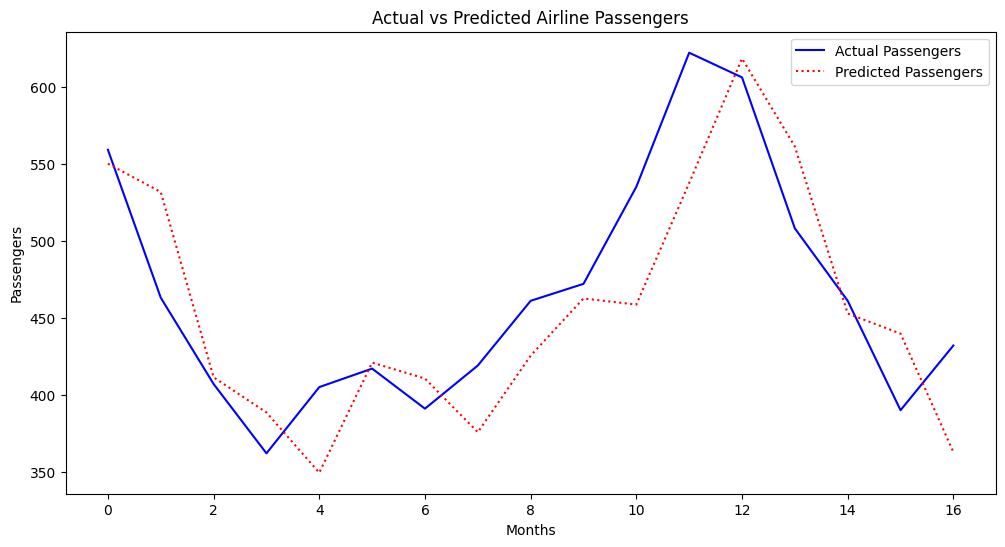

In [29]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Passengers", color='blue')
plt.plot(y_pred, label="Predicted Passengers", linestyle='dotted', color='red')
plt.title("Actual vs Predicted Airline Passengers")
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.legend()
plt.show()
